In [1]:
import retro
import scipy.misc
import matplotlib.pyplot as plt
import os
import numpy as np
import time

from TemplateMatcher import TemplateMatcher

env = None

In [2]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [3]:
if env is None:
    env = retro.make(game='SonicTheHedgehog2-Genesis', state='EmeraldHillZone.Act1')
_ = env.reset()

frame, reward, done, info = env.step( env.action_space.sample() )

In [4]:
sonic_dir = 'data/sonic2/sonic'
sonic_files = os.listdir( sonic_dir )
sonic_files.sort()
sonics = [ scipy.misc.imread( os.path.join( sonic_dir, sonic_file ), mode='RGBA' ) for sonic_file in sonic_files ]

/home/mike/.pyenv/versions/3.6.5/lib/python3.6/site-packages/ipykernel_launcher.py:4: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  after removing the cwd from sys.path.


In [5]:
def imageTo8BitColor( image ):
    assert image.shape[ -1 ] == 3 or image.shape[ -1 ] == 4
    
    output_image = np.zeros( image.shape[ 0 : 2 ], dtype=np.uint8 )

    output_image[ :, : ]  = ( image[ :, :, 0 ] / 32 ).astype( np.uint8 ) * 32 # << 4
    output_image[ :, : ] += ( image[ :, :, 1 ] / 32 ).astype( np.uint8 ) * 4  # << 2 
    output_image[ :, : ] += ( image[ :, :, 2 ] / 64 ).astype( np.uint8 )
    
    alpha = None
    if image.shape[ -1 ] == 4:
        alpha = image[ :, :, 3 ]

    return output_image, alpha

In [6]:
class EightBitTemplateMatching( TemplateMatcher ):
    def preprocessFrame( self, frame ):
        return imageTo8BitColor( frame )[ 0 ]

    def preprocessTemplate( self, template ):
        return imageTo8BitColor( template )

In [7]:
matcher = EightBitTemplateMatching( sonics )
print( len( matcher._processed_templates ), len( matcher._processed_templates[ 0 ] ) )
start_time = time.clock()
store, tl, br, _ = matcher.matchTemplate( frame )
print( time.clock() - start_time )
print( 'after' )

256 2
asdf
(224, 320)
0.015953000000000106
after


before
before
asdf
[72, 121, 75, 112]
(49, 37)
(224, 320)


(0.9920282363891602, (80, 77), (107, 116), 0.012258000000000102)

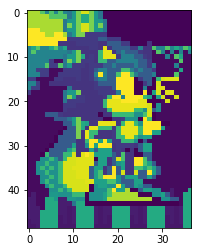

In [8]:
print( 'before' )
start_time = time.clock()
print( 'before' )
matcher.matchTemplate( frame, ( tl, br ) )
# print( time.clock() - start_time )